# Piyush Verma
### 230968114
#### Deep Learning Lab 
Week 4 - Face Mask

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50, EfficientNetB0, MobileNetV2

## Organizing Diretories

In [2]:
base_dir = "Face Mask Dataset"
train_dir = f"{base_dir}/Train"
validation_dir = f"{base_dir}/Validation"
test_dir = f"{base_dir}/Test"

## Preprocessing for LeNet-5 (Input image size - 199x199)

In [3]:
batch_size = 20

train_datagen_128 = ImageDataGenerator(rescale=1./255)
val_datagen_128 = ImageDataGenerator(rescale=1./255)
test_datagen_128 = ImageDataGenerator(rescale=1./255)

train_generator_128 = train_datagen_128.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator_128 = val_datagen_128.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator_128 = test_datagen_128.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


## Preprocessing for AlexNet (Input image size - 227x227)

In [4]:
train_datagen_227 = ImageDataGenerator(rescale=1./255)
val_datagen_227 = ImageDataGenerator(rescale=1./255)
test_datagen_227 = ImageDataGenerator(rescale=1./255)

train_generator_227 = train_datagen_227.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator_227 = val_datagen_227.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator_227 = test_datagen_227.flow_from_directory(
    test_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


## Preprocessing and organizing directories for VGG16, ResNet50, EfficientNetB0 and MobileNetV2 (All have same input image sizes - 224x224)

In [5]:
train_datagen_224 = ImageDataGenerator(rescale=1./255)
val_datagen_224 = ImageDataGenerator(rescale=1./255)
test_datagen_224 = ImageDataGenerator(rescale=1./255)

train_generator_224 = train_datagen_224.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator_224 = val_datagen_224.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator_224 = test_datagen_224.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


## Preprocessing and organizing directories for InceptionV3 (Image input size 299x299)

In [6]:
train_datagen_299 = ImageDataGenerator(rescale=1./255)
val_datagen_299 = ImageDataGenerator(rescale=1./255)
test_datagen_299 = ImageDataGenerator(rescale=1./255)

train_generator_299 = train_datagen_299.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator_299 = val_datagen_299.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator_299 = test_datagen_299.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


## Defining LeNet-5 Model

In [7]:
LeNet5_model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(6, kernel_size=5, padding="same", activation="tanh"),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(16, kernel_size=5, activation="tanh"),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(120, activation="tanh"),
    Dense(84, activation="tanh"),
    Dense(2, activation="softmax")
])

## Compiling LeNet-5

In [8]:
LeNet5_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

## Training LeNet-5

In [9]:
LeNet5_history = LeNet5_model.fit(
    train_generator_128,
    validation_data=val_generator_128,
    epochs=20
)

Epoch 1/20


c:\Users\Kewal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.8499 - loss: 0.3594 - val_accuracy: 0.9625 - val_loss: 0.1176
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9805 - loss: 0.0648 - val_accuracy: 0.9812 - val_loss: 0.0674
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9806 - loss: 0.0575 - val_accuracy: 0.9762 - val_loss: 0.0629
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9770 - loss: 0.0649 - val_accuracy: 0.9663 - val_loss: 0.1022
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9739 - loss: 0.0802 - val_accuracy: 0.9800 - val_loss: 0.0527
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9782 - loss: 0.0622 - val_accuracy: 0.9688 - val_loss: 0.0810
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9801 - loss: 0.0609 - val_accuracy: 0.9800 - val_loss: 0.0610
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9797 - loss: 0.0589 - val_accurac

## Evaluating LeNet-5

In [10]:
loss_lenet, acc_lenet = LeNet5_model.evaluate(test_generator_128)
print(f"LeNet-5 Test accuracy: {acc_lenet:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9567 - loss: 0.1134
LeNet-5 Test accuracy: 0.9597


Here LeNet-5 gives good accuracy

## LeNet-5 Summary

In [11]:
LeNet5_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,728,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,223,980 (19.93 MB)

 Trainable params: 1,741,326 (6.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,482,654 (13.29 MB)

## Defining AlexNet Model

In [12]:
AlexNet_model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, kernel_size=11, strides=4, activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(256, kernel_size=5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

## Compiling AlexNet

In [13]:
AlexNet_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

## Training AlexNet

In [14]:
AlexNet_history = AlexNet_model.fit(
    train_generator_227,
    validation_data=val_generator_227,
    epochs=20
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 319s 633ms/step - accuracy: 0.7723 - loss: 0.6085 - val_accuracy: 0.9350 - val_loss: 0.1851
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 315s 629ms/step - accuracy: 0.9276 - loss: 0.1999 - val_accuracy: 0.9463 - val_loss: 0.1559
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 321s 642ms/step - accuracy: 0.9354 - loss: 0.1729 - val_accuracy: 0.9312 - val_loss: 0.1651
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 321s 641ms/step - accuracy: 0.9512 - loss: 0.1297 - val_accuracy: 0.9538 - val_loss: 0.1244
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 327s 654ms/step - accuracy: 0.9451 - loss: 0.1446 - val_accuracy: 0.9475 - val_loss: 0.1654
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 326s 651ms/step - accuracy: 0.9585 - loss: 0.1186 - val_accuracy: 0.9588 - val_loss: 0.1038
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 321s 642ms/step - accuracy: 0.9597 - loss: 0.1206 - val_accuracy: 0.9663 - val_loss: 0.0774
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 313s 626ms/step - accuracy: 0.9487 -

## Evaluating AlexNet

In [15]:
print("Evaluating AlexNet on test data:")
loss_alexnet, acc_alexnet = AlexNet_model.evaluate(test_generator_227)
print(f"AlexNet Test accuracy: {acc_alexnet:.4f}")

Evaluating AlexNet on test data:
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9678 - loss: 0.1476
AlexNet Test accuracy: 0.9738


AlexNet also gives good accuracy

## AlexNet summary

In [16]:
AlexNet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,868,616 (667.07 MB)

 Trainable params: 58,289,538 (222.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,579,078 (444.71 MB)

Inference : AlexNet has more parameters than LeNet5 due to more layers and complex architecture

## Plotting accuracy and loss for LeNet-5 and AlexNet

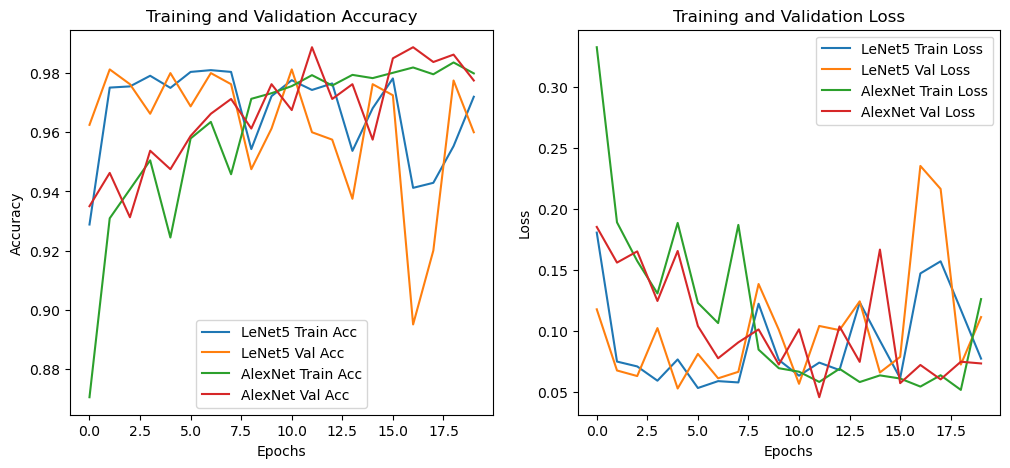

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(LeNet5_history.history['accuracy'], label='LeNet5 Train Acc')
plt.plot(LeNet5_history.history['val_accuracy'], label='LeNet5 Val Acc')
plt.plot(AlexNet_history.history['accuracy'], label='AlexNet Train Acc')
plt.plot(AlexNet_history.history['val_accuracy'], label='AlexNet Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(LeNet5_history.history['loss'], label='LeNet5 Train Loss')
plt.plot(LeNet5_history.history['val_loss'], label='LeNet5 Val Loss')
plt.plot(AlexNet_history.history['loss'], label='AlexNet Train Loss')
plt.plot(AlexNet_history.history['val_loss'], label='AlexNet Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Inference : Accuracy is mostly increasing with epochs and loss is mostly decreasing with epochs, which is the desired/expected result

## Transfer Learning Models

## Model 1 : VGG16

In [18]:
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg.trainable = False

model_vgg = Sequential([
    base_model_vgg,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_vgg.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("Training VGG16...")
history_vgg = model_vgg.fit(
    train_generator_224,
    validation_data=val_generator_224,
    epochs=5
)

print("Evaluating VGG16 on test data:")
loss_vgg, acc_vgg = model_vgg.evaluate(test_generator_224)
print(f"VGG16 Test accuracy: {acc_vgg:.4f}")

Training VGG16...
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 695s 1s/step - accuracy: 0.9431 - loss: 0.1231 - val_accuracy: 0.9962 - val_loss: 0.0110
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 676s 1s/step - accuracy: 0.9934 - loss: 0.0184 - val_accuracy: 0.9887 - val_loss: 0.0306
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.9956 - loss: 0.0132 - val_accuracy: 0.9925 - val_loss: 0.0120
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 687s 1s/step - accuracy: 0.9968 - loss: 0.0090 - val_accuracy: 0.9975 - val_loss: 0.0065
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 673s 1s/step - accuracy: 0.9974 - loss: 0.0064 - val_accuracy: 0.9950 - val_loss: 0.0100
Evaluating VGG16 on test data:
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9974 - loss: 0.0160
VGG16 Test accuracy: 0.9970


## VGG16 summary

In [19]:
model_vgg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,984,584 (129.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,846,598 (49.01 MB)

## Model 2 : InceptionV3

In [20]:
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model_inception.trainable = False

model_inception = Sequential([
    base_model_inception,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_inception.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

print("Training InceptionV3...")
history_inception = model_inception.fit(
    train_generator_299,
    validation_data=val_generator_299,
    epochs=5
)

print("Evaluating InceptionV3 on test data:")
loss_inception, acc_inception = model_inception.evaluate(test_generator_299)
print(f"InceptionV3 Test accuracy: {acc_inception:.4f}")

Training InceptionV3...
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 366s 717ms/step - accuracy: 0.9732 - loss: 0.0861 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 353s 705ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 353s 705ms/step - accuracy: 0.9979 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 9.1529e-04
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 344s 688ms/step - accuracy: 0.9988 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 4.1632e-04
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 333s 665ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 8.2154e-04
Evaluating InceptionV3 on test data:
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 627ms/step - accuracy: 0.9990 - loss: 0.0024
InceptionV3 Test accuracy: 0.9990


## InceptionV3 summary

In [21]:
model_inception.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,377,960 (89.18 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 1,050,118 (4.01 MB)

## Model 3 : ResNet50

In [22]:
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet.trainable = False

model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_resnet.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

print("Training ResNet50...")
history_resnet = model_resnet.fit(
    train_generator_224,
    validation_data=val_generator_224,
    epochs=5
)

print("Evaluating ResNet50 on test data:")
loss_resnet, acc_resnet = model_resnet.evaluate(test_generator_224)
print(f"ResNet50 Test accuracy: {acc_resnet:.4f}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 106s 1us/step
Training ResNet50...
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 338s 665ms/step - accuracy: 0.5478 - loss: 0.7497 - val_accuracy: 0.6700 - val_loss: 0.6222
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 336s 672ms/step - accuracy: 0.6631 - loss: 0.6195 - val_accuracy: 0.7025 - val_loss: 0.5888
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 336s 671ms/step - accuracy: 0.6929 - loss: 0.5866 - val_accuracy: 0.7225 - val_loss: 0.5684
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 329s 658ms/step - accuracy: 0.7328 - loss: 0.5537 - val_accuracy: 0.7250 - val_loss: 0.5362
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 330s 659ms/step - accuracy: 0.7581 - loss: 0.5214 - val_accuracy: 0.7850 - val_loss: 0.4929
Evaluating ResNet50 on test data:
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 598ms/step - accuracy: 0.8101 - loss: 0.4755
ResNet50 Test accuracy: 0.8044


## ResNet50 Summary

In [23]:
model_resnet.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,162,888 (95.99 MB)

 Trainable params: 525,058 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 1,050,118 (4.01 MB)

## Model 4 : EfficientNetB0

In [24]:
base_model_effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_effnet.trainable = False

model_effnet = Sequential([
    base_model_effnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_effnet.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

print("Training EfficientNetB0...")
history_effnet = model_effnet.fit(
    train_generator_224,
    validation_data=val_generator_224,
    epochs=5
)

print("Evaluating EfficientNetB0 on test data:")
loss_effnet, acc_effnet = model_effnet.evaluate(test_generator_224)
print(f"EfficientNetB0 Test accuracy: {acc_effnet:.4f}")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step
Training EfficientNetB0...
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 160s 305ms/step - accuracy: 0.4934 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 152s 303ms/step - accuracy: 0.5003 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 150s 300ms/step - accuracy: 0.5019 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 150s 301ms/step - accuracy: 0.4930 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 151s 301ms/step - accuracy: 0.5005 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Evaluating EfficientNetB0 on test data:
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - accuracy: 0.5041 - loss: 0.6931
EfficientNetB0 Test accuracy: 0.5131


## EfficientNetB0

In [25]:
model_effnet.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,034,923 (19.21 MB)

 Trainable params: 328,450 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 656,902 (2.51 MB)

## Model 5 : MobileNetV2

In [26]:
base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_mobilenet.trainable = False

model_mobilenet = Sequential([
    base_model_mobilenet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_mobilenet.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

print("Training MobileNetV2...")
history_mobilenet = model_mobilenet.fit(
    train_generator_224,
    validation_data=val_generator_224,
    epochs=5
)

print("Evaluating MobileNetV2 on test data:")
loss_mobilenet, acc_mobilenet = model_mobilenet.evaluate(test_generator_224)
print(f"MobileNetV2 Test accuracy: {acc_mobilenet:.4f}")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
Training MobileNetV2...
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 120s 233ms/step - accuracy: 0.9225 - loss: 0.1811 - val_accuracy: 0.9925 - val_loss: 0.0247
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 116s 231ms/step - accuracy: 0.9882 - loss: 0.0338 - val_accuracy: 0.9962 - val_loss: 0.0171
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 115s 231ms/step - accuracy: 0.9918 - loss: 0.0226 - val_accuracy: 0.9962 - val_loss: 0.0178
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 116s 231ms/step - accuracy: 0.9934 - loss: 0.0187 - val_accuracy: 0.9950 - val_loss: 0.0148
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 116s 231ms/step - accuracy: 0.9958 - loss: 0.0112 - val_accuracy: 0.9950 - val_loss: 0.0119
Evaluating MobileNetV2 on test data:
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.9978 - loss: 0.0066
MobileNetV2 Test accuracy: 0.9950


## MobileNetV2 summary

In [27]:
model_mobilenet.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,336 (12.37 MB)

 Trainable params: 328,450 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 656,902 (2.51 MB)